In [5]:
import pandas as pd
df = pd.read_csv('./data_cleaning.csv',sep=';')
#df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
df.drop(df.loc[df['ncm'] == '00000000'].index, inplace=True)
df['NCM-2'] = df['ncm'].astype(str).str[:2]
df['NCM-4'] = df['ncm'].astype(str).str[2:4]
df['NCM-6'] = df['ncm'].astype(str).str[4:6]
df['NCM-8'] = df['ncm'].astype(str).str[6:8]
df = df.drop(columns=['Unnamed: 0'])
df.drop(df.loc[df['NCM-2'] == '00'].index, inplace=True)
df = df.dropna()

C:\Users\Pedro Pinheiro\AppData\Local\Temp\ipykernel_7764\3277901157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]


In [6]:
df_ncm_2 = df.drop(columns=['ncm','NCM-4','NCM-6','NCM-8'])
df_ncm_4 = df.drop(columns=['ncm','NCM-2','NCM-6','NCM-8'])
df_ncm_6 = df.drop(columns=['ncm','NCM-2','NCM-4','NCM-8'])
df_ncm_8 = df.drop(columns=['ncm','NCM-2','NCM-4','NCM-6'])


df_group_ncm_2 = df_ncm_2.groupby('NCM-2').count()
df_group_ncm_4 = df_ncm_4.groupby('NCM-4').count()
df_group_ncm_6 = df_ncm_6.groupby('NCM-6').count()
df_group_ncm_8 = df_ncm_8.groupby('NCM-8').count()

In [7]:
df_ncm_2['media'] = df_group_ncm_2.mean()[0]
df_ncm_2['desvio'] = df_group_ncm_2.std()[0]

df_ncm_4['media'] = df_group_ncm_4.mean()[0]
df_ncm_4['desvio'] = df_group_ncm_4.std()[0]

df_ncm_6['media'] = df_group_ncm_6.mean()[0]
df_ncm_6['desvio'] = df_group_ncm_6.std()[0]

df_ncm_8['media'] = df_group_ncm_8.mean()[0]
df_ncm_8['desvio'] = df_group_ncm_8.std()[0]

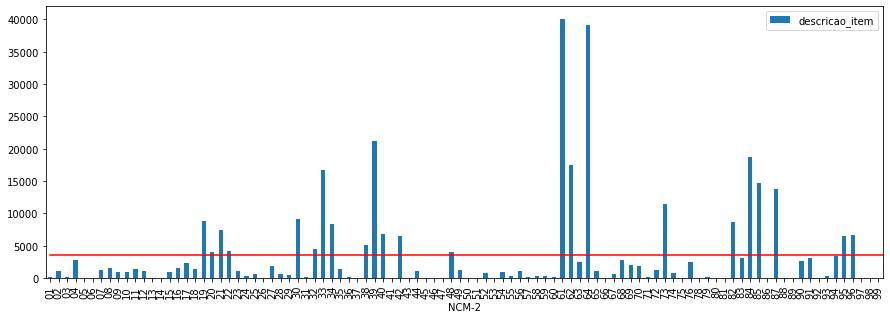

In [8]:
df_group_ncm_2.plot.bar( figsize=(15, 5)).plot(df_ncm_2.media, color='red')


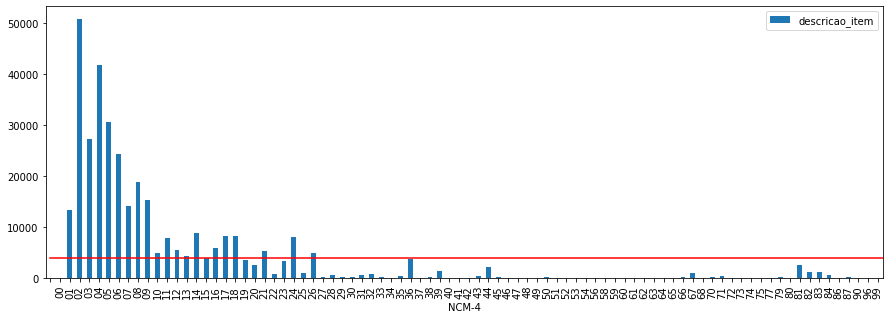

In [9]:
df_group_ncm_4.plot.bar( figsize=(15, 5)).plot(df_ncm_4.media, color='red')


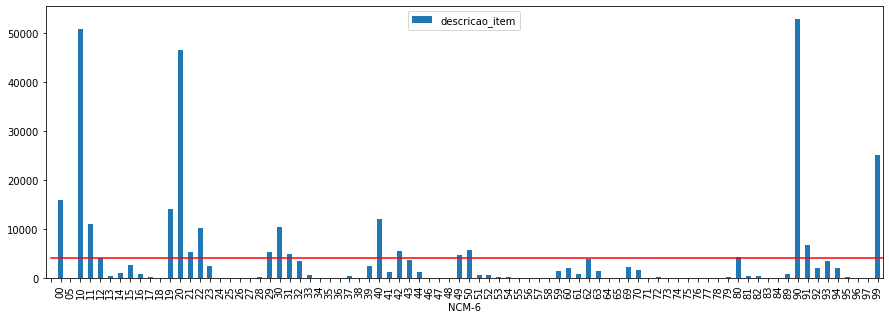

In [10]:
df_group_ncm_6.plot.bar( figsize=(15, 5)).plot(df_ncm_6.media, color='red')

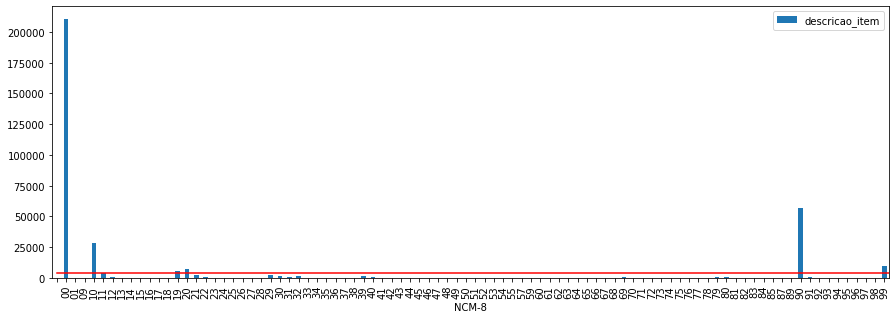

In [11]:
df_group_ncm_8.plot.bar( figsize=(15, 5)).plot(df_ncm_8.media, color='red')

In [8]:
import pandas as pd
from deep_translator import GoogleTranslator

def balance_data(df_group,df,ncm_ns):

    over5000 = []
    median = []
    less1000 = []


    for i in range(len(df_group)):
        if df_group['descricao_item'].iloc[i] > 5000:
            over5000.append(df_group['descricao_item'].index[i])
        elif df_group['descricao_item'].iloc[i] < 1000:
            less1000.append(df_group['descricao_item'].index[i])
        else:
            median.append(df_group['descricao_item'].index[i])

    print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")


    for i in less1000:
        print(i)
        try:
            while len(df.loc[df[ncm_ns] == i]) < 1000:
                print(len(df.loc[df[ncm_ns] == i]))
                to_translate = list(df['descricao_item'].loc[df[ncm_ns] == i])
                translated_1 = GoogleTranslator(source='pt', target='en').translate_sentences(to_translate)
                print('segunda traducao')
                translated_2 = GoogleTranslator(source='en', target='pt').translate_sentences(translated_1)
                for desc in translated_2:
                    new_row = {'descricao_item':desc, ncm_ns:i}
                    df = df.append(new_row, ignore_index=True)
        except:
            continue
        
    #DROP menores que 1000
    for i in less1000:
        df.drop(df.loc[df[ncm_ns] == i].index, inplace=True)




    for i in over5000: 
        remove_n = len(df.loc[df[ncm_ns] == i ]) - 5000
        remove_class = i
        # Here you first find the indexes where class is equal to the class you want to drop.
        #Then you slice only the first n indexes of this class
        index_to_drop = df.index[df[ncm_ns] == remove_class][:remove_n]
        #Finally drop those indexes
        df = df.drop(index_to_drop)
    
    return df

In [ ]:
df_ncm_2 = balance_data(df_group_ncm_2,df_ncm_2,'NCM-2')
df_ncm_2.to_csv('data_balanced.csv', encoding='utf-8', index=False)

In [14]:
df_ncm_2

,descricao_item,NCM-2,media,desvio
5,DISPLAY TOTEN PS MARLUVAS PES,49,3499.040816,6885.238267
16,OIL E7 15W GRANEL DEP,27,3499.040816,6885.238267
23,CS K BB CS TINTA 2L PRETA,32,3499.040816,6885.238267
48,KIT DE PROTECAO INFANTIL CAPITAO ESTRELA TAM...,65,3499.040816,6885.238267
68,Livro IM Interativo Coreldraw x,49,3499.040816,6885.238267
...,...,...,...,...
342901,ZIN E MAQUINA DO VIDRO ESQUERDA PINO ALTO,87,3499.040816,6885.238267
342902,"ZINCO 100CM 3,50KG P MT CP",72,3499.040816,6885.238267
342903,ZMM 9010811 ALTERNADOR 12V AMP,85,3499.040816,6885.238267
342904,ZORDS COM FIGURA E,95,3499.040816,6885.238267


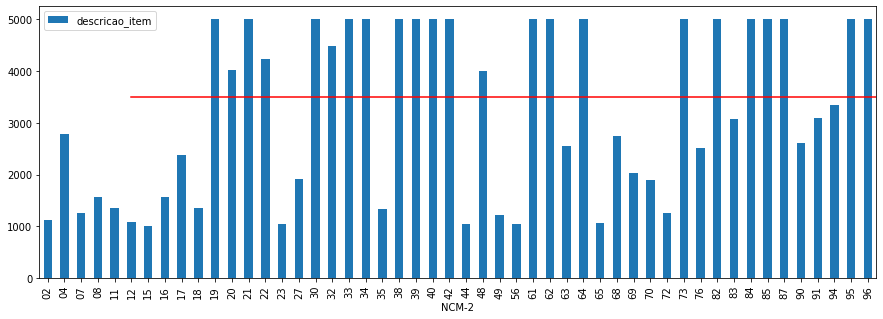

In [16]:
df_ncm_2_balanced = df_ncm_2.drop(columns=['media','desvio'])
df_group_ncm_2_balanced = df_ncm_2_balanced.groupby('NCM-2').count()
df_group_ncm_2_balanced.plot.bar( figsize=(15, 5)).plot(df_ncm_2.media, color='red')

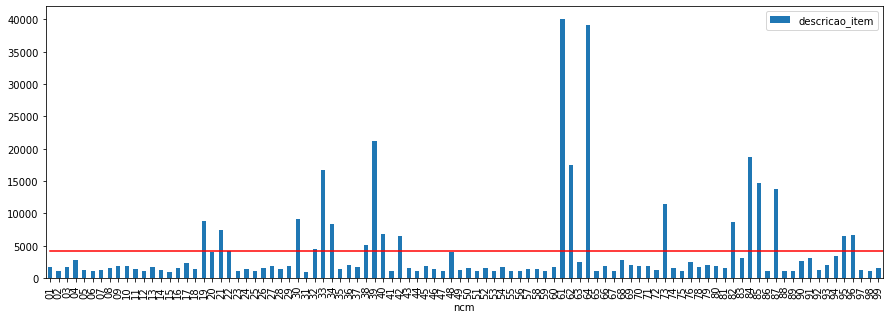

In [19]:
import pandas as pd
df_oversample = pd.read_csv('./saida_oversample_2.csv',sep=',', dtype = {'descricao_item': str, 'ncm': str})
df_oversample = df_oversample.drop(columns=['Unnamed: 0'])
df_group_ncm_2_oversample = df_oversample.groupby('ncm').count()
df_oversample['media'] = df_group_ncm_2_oversample.mean()[0]
df_oversample['desvio'] = df_group_ncm_2_oversample.std()[0]
df_group_ncm_2_oversample.plot.bar( figsize=(15, 5)).plot(df_oversample.media, color='red')

In [20]:
teste =  balance_data(df_group_ncm_2_oversample,df_oversample,'ncm')

acima de 5000 amostras 19
entre 5000 e 1000 79
abaixo de 1000 0


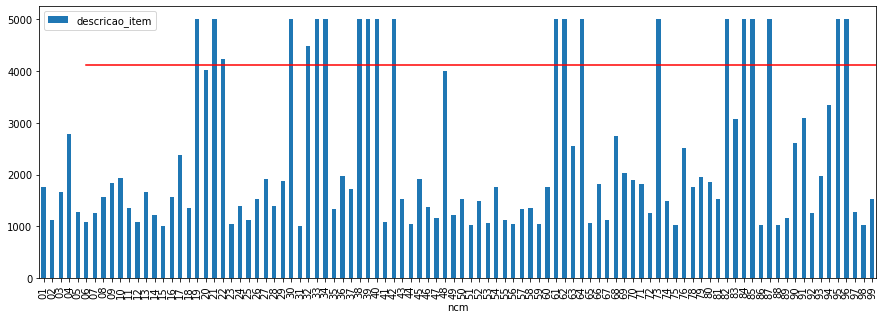

In [21]:

df_ncm_2_balanced_teste = teste.drop(columns=['media','desvio'])
df_group_ncm_2_balanced_teste = df_ncm_2_balanced_teste.groupby('ncm').count()
df_group_ncm_2_balanced_teste.plot.bar( figsize=(15, 5)).plot(teste.media, color='red')

In [67]:
teste

,descricao_item,ncm,media,desvio
5,DISPLAY TOTEN PS MARLUVAS PES,49,4108.520408,6614.829992
16,OIL E7 15W GRANEL DEP,27,4108.520408,6614.829992
23,CS K BB CS TINTA 2L PRETA,32,4108.520408,6614.829992
48,KIT DE PROTECAO INFANTIL CAPITAO ESTRELA TAM...,65,4108.520408,6614.829992
68,Livro IM Interativo Coreldraw x,49,4108.520408,6614.829992
...,...,...,...,...
402630,HEAVY BLACK FABRIC,60,4108.520408,6614.829992
402631,TERMINAL MASCULINO 11 16 X 3,60,4108.520408,6614.829992
402632,LISO ROMA TULE EM P A BLACK MT,60,4108.520408,6614.829992
402633,MODINHA DRESS REF 110 A,60,4108.520408,6614.829992


In [76]:
teste.loc[teste['descricao_item'] == df.iloc[0]['descricao_item']]


,descricao_item,ncm,media,desvio


In [77]:
df.iloc[0]

descricao_item    BETAISTINA DICLOR MG  CPS   GEN Dicloridrato d...
ncm                                                        30049069
NCM-2                                                            30
NCM-4                                                            04
NCM-6                                                            90
NCM-8                                                            69
Name: 0, dtype: object

In [16]:
import pandas as pd
df = pd.read_csv('./produtos_unicos_tbl_202202161614.csv',sep=';',dtype = {'descricao_item': str, 'ncm': str})
#df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
df.drop(df.loc[df['ncm'] == '00000000'].index, inplace=True)
df['NCM-2'] = df['ncm'].astype(str).str[:2]
df['NCM-4'] = df['ncm'].astype(str).str[2:4]
df['NCM-6'] = df['ncm'].astype(str).str[4:6]
df['NCM-8'] = df['ncm'].astype(str).str[6:8]
df.drop(df.loc[df['NCM-2'] == '00'].index, inplace=True)
df.drop(df.loc[df['NCM-2'] == '0n'].index, inplace=True)
df = df.dropna()

In [17]:
df_ncm_2 = df.drop(columns=['ncm','NCM-4','NCM-6','NCM-8'])
df_ncm_4 = df.drop(columns=['ncm','NCM-2','NCM-6','NCM-8'])
df_ncm_6 = df.drop(columns=['ncm','NCM-2','NCM-4','NCM-8'])
df_ncm_8 = df.drop(columns=['ncm','NCM-2','NCM-4','NCM-6'])


df_group_ncm_2 = df_ncm_2.groupby('NCM-2').count()
df_group_ncm_4 = df_ncm_4.groupby('NCM-4').count()
df_group_ncm_6 = df_ncm_6.groupby('NCM-6').count()
df_group_ncm_8 = df_ncm_8.groupby('NCM-8').count()

df_ncm_2['media'] = df_group_ncm_2.mean()[0]
df_ncm_2['desvio'] = df_group_ncm_2.std()[0]

df_ncm_4['media'] = df_group_ncm_4.mean()[0]
df_ncm_4['desvio'] = df_group_ncm_4.std()[0]

df_ncm_6['media'] = df_group_ncm_6.mean()[0]
df_ncm_6['desvio'] = df_group_ncm_6.std()[0]

df_ncm_8['media'] = df_group_ncm_8.mean()[0]
df_ncm_8['desvio'] = df_group_ncm_8.std()[0]

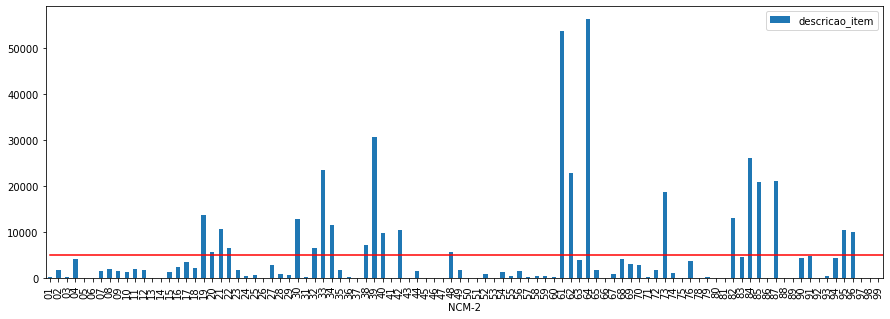

In [18]:
df_group_ncm_2.plot.bar( figsize=(15, 5)).plot(df_ncm_2.media, color='red')

In [40]:
teste

,descricao_item,ncm,media,desvio
5,DISPLAY TOTEN PS MARLUVAS PES,49,4108.520408,6614.829992
16,OIL E7 15W GRANEL DEP,27,4108.520408,6614.829992
23,CS K BB CS TINTA 2L PRETA,32,4108.520408,6614.829992
48,KIT DE PROTECAO INFANTIL CAPITAO ESTRELA TAM...,65,4108.520408,6614.829992
68,Livro IM Interativo Coreldraw x,49,4108.520408,6614.829992
...,...,...,...,...
402630,HEAVY BLACK FABRIC,60,4108.520408,6614.829992
402631,TERMINAL MASCULINO 11 16 X 3,60,4108.520408,6614.829992
402632,LISO ROMA TULE EM P A BLACK MT,60,4108.520408,6614.829992
402633,MODINHA DRESS REF 110 A,60,4108.520408,6614.829992


In [ ]:
for i in range(10):
    print(df['descricao_item'].iloc[i]]) 
    print(teste.loc[teste['descricao_item'] == df['descricao_item'].iloc[i]])

SELECT descricao_item, ncm  FROM dbo.produtos_unicos_tbl WHERE descricao_item like '%CS K BB  CS TINTA  2L PRETA%' 
[]


In [62]:
import nltk
import psycopg2
import textdistance
from unidecode import unidecode
from random import choice
from collections import Counter


def most_freq(saida):
    lis = saida  # Test data
    cmn = Counter(lis).most_common()  # Numbering based on occurrence
    most = [e for e in cmn if (e[1] == cmn[0][1])]  # List of those most common
    return(choice(most)[0])  # Print one of the most common at random



def strcmp96pg(descricao):
    produto = descricao
    descricao = descricao.replace('Cancelado','')
    descricao = descricao.replace('CANCELADO','')
    descricao = descricao.replace('cancelado','')
    var_return = "", 0
    var_test = 0
    produto = unidecode(produto)
    produto = produto.translate({ord(c): " " for c in "!@#$%^&*()[]{};':<>?|`~-=_+/.\\,"}) #TODO comentar com o pedro sobre essa barra
    splitProd = produto.split()

    try:
        stopword = nltk.corpus.stopwords.words('portuguese')
    except:
        nltk.download('stopwords')
        stopword = nltk.corpus.stopwords.words('portuguese')
    stopword.append('Cancelado')
    stopword.append('CANCELADO')
    stopword.append('cancelado')

    splitProd = [x for x in splitProd if x not in stopword and len(x) > 2]
    
    try:
        conn = psycopg2.connect(database=db_aurora, user=uname_aurora, password=pword_aurora, host=server_aurora, port=porta_aurora)
        cursor = conn.cursor()
    except (Exception, psycopg2.Error) as error :
        print("Error while connecting to PG", error)
        exit()
    x = " & ".join(splitProd)
    cursor.execute(f"SELECT descricao_item, id_item FROM dbo.produtos_unicos_tbl WHERE descricao_tokens @@ to_tsquery('{x}') and pendente IS NOT NULL;")
    result = cursor.fetchone()
    if result:
        dicit = {}
        lista = []
        new_values = []
        while result:
            var_test = textdistance.strcmp95.normalized_similarity(descricao, result[0])                
            if len(dicit.keys()) < 5:
                dicit[var_test] = result[0] + '$#id#$' + str(result[1])
            else:
                lista = list(dicit.keys())
                listanw = sorted(lista)
                if var_test > listanw[0]:
                    dicit[var_test] = result[0] + '$#id#$' + str(result[1])
                    del(dicit[listanw[0]])
            result = cursor.fetchone()
        if len(dicit.keys()) > 0:
            for d in dicit.values():
                if '$#id#$' in d:
                    d = d.split('$#id#$')[1]
                    new_values.append(d)
        if len(tuple(dicit.values())) > 1:
            cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item in {tuple(new_values)} and pendente IS NOT NULL ")
        else:#talvez colocar o ilike nessa proxima query
            cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item = '{new_values[0]}' and pendente IS NOT NULL ")
        saida = cursor.fetchall()
        new = []
        for d in saida:
            new.append(d[2:])
        result_saida = most_freq(new)
        for d in saida:
            if result_saida == d[2:]:
                var_test = textdistance.strcmp95.normalized_similarity(descricao, d[0])
                if var_test > var_return[1]:
                    var_return =  d[1], var_test
        if var_test < 0.85:
            dicit = {}
            lista = []
            new_values = []
            x = " | ".join(splitProd)
            cursor.execute(f"SELECT descricao_item, id_item FROM producao.dbo.produtos_unicos_tbl WHERE descricao_tokens @@ to_tsquery('{x}') and pendente IS NOT NULL;")
            result = cursor.fetchone()
            if result:
                while result:
                    var_test = textdistance.strcmp95.normalized_similarity(descricao, result[0])                
                    if len(dicit.keys()) < 5:
                        dicit[var_test] = result[0]  + '$#id#$' + str(result[1])
                    else:
                        lista = list(dicit.keys())
                        listanw = sorted(lista)
                        if var_test > listanw[0]:
                            dicit[var_test] = result[0] + '$#id#$' + str(result[1])
                            del(dicit[listanw[0]])
                    result = cursor.fetchone()
                for d in dicit.values():
                    if '$#id#$' in d:
                        d = d.split('$#id#$')[1]
                        new_values.append(d)
                if len(tuple(dicit.values())) > 1:
                    cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item in {tuple(new_values)} and pendente IS NOT NULL ")
                else:#talvez colocar o ilike nessa proxima query
                    cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item = '{new_values[0]}' and pendente IS NOT NULL ")
                saida = cursor.fetchall()
                new = []
                for d in saida:
                    new.append(d[2:])

                result_saida = most_freq(new)
                for d in saida:
                    if result_saida == d[2:]:
                        var_test = textdistance.strcmp95.normalized_similarity(descricao, d[0])
                        if var_test > var_return[1]:
                            var_return =  d[1], var_test

            else:
                dicit = {}
                lista = []
                new_values = []
                cursor.execute(f"SELECT descricao_item, id_item FROM producao.dbo.produtos_unicos_tbl IS NOT NULL;")
                result = cursor.fetchone()
                if result:
                    while result:
                        var_test = textdistance.strcmp95.normalized_similarity(descricao, result[0])                
                        if len(dicit.keys()) < 5:
                            dicit[var_test] = result[0]  + '$#id#$' + str(result[1])
                        else:
                            lista = list(dicit.keys())
                            listanw = sorted(lista)
                            if var_test > listanw[0]:
                                dicit[var_test] = result[0] + '$#id#$' + str(result[1])
                                del(dicit[listanw[0]])
                        result = cursor.fetchone()
                    for d in dicit.values():
                        if '$#id#$' in d:
                            d = d.split('$#id#$')[1]
                            new_values.append(d)
                    if len(tuple(dicit.values())) > 1:
                        cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item in {tuple(new_values)} and pendente IS NOT NULL ")
                    else:#talvez colocar o ilike nessa proxima query
                        cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item = '{new_values[0]}' and pendente IS NOT NULL ")
                    saida = cursor.fetchall()
                    new = []
                    for d in saida:
                        new.append(d[2:])

                    result_saida = most_freq(new)
                    for d in saida:
                        if result_saida == d[2:]:
                            var_test = textdistance.strcmp95.normalized_similarity(descricao, d[0])
                            if var_test > var_return[1]:
                                var_return =  d[1], var_test
                else:
                    print("o banco tá vazio")
                    exit(True)

    else:
        dicit = {}
        lista = []
        new_values = []
        x = " | ".join(splitProd)
        cursor.execute(f"SELECT descricao_item, id_item FROM producao.dbo.produtos_unicos_tbl WHERE descricao_tokens @@ to_tsquery('{x}') and pendente IS NOT NULL;")
        result = cursor.fetchone()
        if result:
            while result:
                var_test = textdistance.strcmp95.normalized_similarity(descricao, result[0])                
                if len(dicit.keys()) < 5:
                    dicit[var_test] = result[0]  + '$#id#$' + str(result[1])
                else:
                    lista = list(dicit.keys())
                    listanw = sorted(lista)
                    if var_test > listanw[0]:
                        dicit[var_test] = result[0] + '$#id#$' + str(result[1])
                        del(dicit[listanw[0]])
                result = cursor.fetchone()
            for d in dicit.values():
                if '$#id#$' in d:
                    d = d.split('$#id#$')[1]
                    new_values.append(d)
            if len(tuple(dicit.values())) > 1:
                cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item in {tuple(new_values)} and pendente IS NOT NULL ")
            else:#talvez colocar o ilike nessa proxima query
                cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item = '{new_values[0]}' and pendente IS NOT NULL ")
            saida = cursor.fetchall()
            new = []
            for d in saida:
                new.append(d[2:])

            result_saida = most_freq(new)
            for d in saida:
                if result_saida == d[2:]:
                    var_test = textdistance.strcmp95.normalized_similarity(descricao, d[0])
                    if var_test > var_return[1]:
                        var_return =  d[1], var_test

        else:
            dicit = {}
            lista = []
            new_values = []
            cursor.execute(f"SELECT descricao_item, id_item FROM producao.dbo.produtos_unicos_tbl WHERE pendente IS NOT NULL;")
            result = cursor.fetchone()
            if result:
                while result:
                    var_test = textdistance.strcmp95.normalized_similarity(descricao, result[0])                
                    if len(dicit.keys()) < 5:
                        dicit[var_test] = result[0]  + '$#id#$' + str(result[1])
                    else:
                        lista = list(dicit.keys())
                        listanw = sorted(lista)
                        if var_test > listanw[0]:
                            dicit[var_test] = result[0] + '$#id#$' + str(result[1])
                            del(dicit[listanw[0]])
                    result = cursor.fetchone()
                for d in dicit.values():
                    if '$#id#$' in d:
                        d = d.split('$#id#$')[1]
                        new_values.append(d)
                if len(tuple(dicit.values())) > 1:
                    cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item in {tuple(new_values)} and pendente IS NOT NULL ")
                else:#talvez colocar o ilike nessa proxima query
                    cursor.execute(f"SELECT descricao_item,ncm FROM producao.dbo.produtos_unicos_tbl WHERE id_item = '{new_values[0]}' and pendente IS NOT NULL ")
                saida = cursor.fetchall()
                new = []
                for d in saida:
                    new.append(d[2:])

                result_saida = most_freq(new)
                for d in saida:
                    if result_saida == d[2:]:
                        var_test = textdistance.strcmp95.normalized_similarity(descricao, d[0])
                        if var_test > var_return[1]:
                            var_return =  d[1], var_test
            else:
                print("o banco tá vazio")
                exit(True)
    
    conn.close()
    return var_return #o que retorna aqui


In [82]:
#a = strcmp96pg(teste['descricao_item'].iloc[2])
#print(teste['descricao_item'].iloc[2],a[0])
#for i in range(10):
for i in range(len(teste)):
    a = strcmp96pg(teste['descricao_item'].iloc[i])
    print(i,teste['descricao_item'].iloc[i],a[0])
    teste['ncm'].loc[teste['descricao_item'] == teste['descricao_item'].iloc[i]] = str(a[0])


#teste

0 DISPLAY TOTEN PS MARLUVAS    PES 49111090


C:\Users\Pedro Pinheiro\AppData\Local\Temp\ipykernel_2524\3807130821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['ncm'].loc[teste['descricao_item'] == teste['descricao_item'].iloc[i]] = str(a[0])


1 OIL E7 15W GRANEL              DEP 27101932
2 CS K BB  CS TINTA  2L PRETA 32151100
3 KIT DE PROTECAO INFANTIL CAPITAO ESTRELA   TAMANHO UNICO   IDADE 65069100
4 Livro IM Interativo Coreldraw x 48209000
5 Livro IM Interativo KIDS   Arquipologo Dos Saber  MICROSOFT WORD 49019900
6 # Livro GPE 49019900
7 Livro IM Interativo Autocad  MOD I Parte 49019900
8 Livro IM Interativo Photoshop CS 49019900
9 Livro IM Interativo Telemarketing e Vendas 49019900
10 Livro IM Interativo Autocad  MOD I  Parte 49019900
11 Livro IM Interativo Windows 49019900
12 Livro IM Interativo Autocad 23 MOD I  Parte 48201000
13 KIT DE PROTECAO INFANTIL RADICAL GIRL   TAMANHO UNICO   IDADE 65069100
14 Livro IM Interativo Word 49019900
15 Livro IM Interativo D Studio  Mod II 49019900
16 # Livro IM Interativo Gestao de Pessoas 49019900
17 LIVRO IM INTERATIVO EXCEL  AVANCADO 48201000
18 Livro Powerpoint 49019900
19 # LIVRO IM INTERATIVO FOTOGRAFIA DIGITAL 49019900
20 Livro IM Interativo Adobe Photoshop CC 49019900
21 L

KeyboardInterrupt: 

In [13]:
import pandas as pd
df = pd.read_csv('./produtos_unicos_tbl_202202161614.csv',sep=';',dtype = {'descricao_item': str, 'ncm': str})
#df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
df.drop(df.loc[df['ncm'] == '00000000'].index, inplace=True)
df['NCM-2'] = df['ncm'].astype(str).str[:2]
df['NCM-4'] = df['ncm'].astype(str).str[2:4]
df['NCM-6'] = df['ncm'].astype(str).str[4:6]
df['NCM-8'] = df['ncm'].astype(str).str[6:8]
df.drop(df.loc[df['NCM-2'] == '00'].index, inplace=True)
df.drop(df.loc[df['NCM-2'] == '0n'].index, inplace=True)
df = df.dropna()

In [20]:
df_ncm_2 = df.drop(columns=['ncm','NCM-4','NCM-6','NCM-8'])
df_ncm_4 = df.drop(columns=['ncm','NCM-2','NCM-6','NCM-8'])
df_ncm_6 = df.drop(columns=['ncm','NCM-2','NCM-4','NCM-8'])
df_ncm_8 = df.drop(columns=['ncm','NCM-2','NCM-4','NCM-6'])


df_group_ncm_2 = df_ncm_2.groupby('NCM-2').count()
df_group_ncm_4 = df_ncm_4.groupby('NCM-4').count()
df_group_ncm_6 = df_ncm_6.groupby('NCM-6').count()
df_group_ncm_8 = df_ncm_8.groupby('NCM-8').count()

df_ncm_2['media'] = df_group_ncm_2.mean()[0]
df_ncm_2['desvio'] = df_group_ncm_2.std()[0]

df_ncm_4['media'] = df_group_ncm_4.mean()[0]
df_ncm_4['desvio'] = df_group_ncm_4.std()[0]

df_ncm_6['media'] = df_group_ncm_6.mean()[0]
df_ncm_6['desvio'] = df_group_ncm_6.std()[0]

df_ncm_8['media'] = df_group_ncm_8.mean()[0]
df_ncm_8['desvio'] = df_group_ncm_8.std()[0]

In [21]:
df_group = df_group_ncm_2
over5000 = []
median = []
less1000 = []

for i in range(len(df_group)):
    if df_group['descricao_item'].iloc[i] > 5000:
        over5000.append(df_group['descricao_item'].index[i])
    elif df_group['descricao_item'].iloc[i] < 500:
        less1000.append(df_group['descricao_item'].index[i])
    else:
        median.append(df_group['descricao_item'].index[i])

print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")


acima de 5000 amostras 0
entre 5000 e 1000 98
abaixo de 1000 0


In [47]:
list(df['ncm'].loc[df['descricao_item'] == 'AMORA'])[0]

'08102000'

In [16]:
less1000

['01',
 '03',
 '05',
 '06',
 '13',
 '14',
 '24',
 '26',
 '31',
 '36',
 '37',
 '41',
 '43',
 '45',
 '46',
 '47',
 '50',
 '51',
 '53',
 '55',
 '57',
 '58',
 '59',
 '60',
 '66',
 '71',
 '75',
 '78',
 '79',
 '80',
 '81',
 '86',
 '88',
 '89',
 '92',
 '93',
 '97',
 '98',
 '99']

In [11]:
print(len(df.loc[df['NCM-2'] == i]))))

189


TypeError: object of type 'NoneType' has no len()

In [17]:
for i in less1000:
    while len(df.loc[df['NCM-2'] == i]) < 1000:
        print(len(df.loc[df['NCM-2'] == i]))
        df_new = df.loc[df['NCM-2'] == i]
        df = pd.concat([df,df_new])

189
378
756
330
660
26
52
104
208
416
832
23
46
92
184
368
736
28
56
112
224
448
896
41
82
164
328
656
496
992
5
10
20
40
80
160
320
640
267
534
194
388
776
78
156
312
624
22
44
88
176
352
704
10
20
40
80
160
320
640
18
36
72
144
288
576
63
126
252
504
13
26
52
104
208
416
832
4
8
16
32
64
128
256
512
10
20
40
80
160
320
640
98
196
392
784
348
696
252
504
494
988
359
718
296
592
78
156
312
624
333
666
4
8
16
32
64
128
256
512
68
136
272
544
163
326
652
35
70
140
280
560
4
8
16
32
64
128
256
512
12
24
48
96
192
384
768
7
14
28
56
112
224
448
896
22
44
88
176
352
704
88
176
352
704
357
714
26
52
104
208
416
832
2
4
8
16
32
64
128
256
512
11
22
44
88
176
352
704


In [18]:
for i in over5000: 
    remove_n = len(df.loc[df['NCM-2'] == i ]) - 5000
    remove_class = i
    # Here you first find the indexes where class is equal to the class you want to drop.
    #Then you slice only the first n indexes of this class
    index_to_drop = df.index[df['NCM-2'] == remove_class][:remove_n]
    #Finally drop those indexes
    df = df.drop(index_to_drop)

In [19]:
df

,descricao_item,ncm,NCM-2,NCM-4,NCM-6,NCM-8
1,PASTA ESMERILHAR VALVULAS 110 GR,28182090,28,18,20,90
3,AMORA,08102000,08,10,20,00
9,ELEMENTO VAZADO DIAGONAL REDONDO 18X07CM,69051000,69,05,10,00
23,FELTRO QUADRADO 30MM PRETO TEK BOND,56029000,56,02,90,00
32,"PLACA TRAS. ALUM.SERDAN 600X130X0,8MM",83100000,83,10,00,00
...,...,...,...,...,...,...
194726,PORTA LATA,99999999,99,99,99,99
287176,CALCA MASC. INFANTIL 3003-442 FWT,99000564,99,00,05,64
375385,OLEO HIDRAULICO ATF TIPO A,99900028,99,90,00,28
378712,COCHO GRANDE,99999999,99,99,99,99


In [29]:
import pandas as pd
#from deep_translator import GoogleTranslator

def balance_data(df_group,df,ncm_ns):

    over5000 = []
    median = []
    less1000 = []


    for i in range(len(df_group)):
        if df_group['descricao_item'].iloc[i] > 5000:
            over5000.append(df_group['descricao_item'].index[i])
        elif df_group['descricao_item'].iloc[i] < 500:
            less1000.append(df_group['descricao_item'].index[i])
        else:
            median.append(df_group['descricao_item'].index[i])

    print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")

    for i in less1000:
        print(i)
        try:
            while len(df.loc[df[ncm_ns] == i]) < 500:
                #print(i)
                to_translate = list(df['descricao_item'].loc[df[ncm_ns] == i])
                print(len(to_translate))
                translated_1 = GoogleTranslator(source='pt', target='en').translate_batch(to_translate)
                print(len(translated_1))
                translated_2 = GoogleTranslator(source='en', target='pt').translate_batch(translated_1)
                print(len(translated_2))
                x = 0
                for desc in translated_2:
                    
                    new = {'descricao_item':[desc], 'ncm':list(df['ncm'].loc[df['descricao_item'] == to_translate[x]])[0]}
                    x = x + 1
                    new_row = pd.DataFrame(new)
                    df = pd.concat([df, new_row], ignore_index = True, axis = 0)
        except Exception as e:
            print(e)
            continue
        
    #DROP menores que 1000
    for i in less1000:
        df.drop(df.loc[df[ncm_ns] == i].index, inplace=True)




    for i in over5000: 
        remove_n = len(df.loc[df[ncm_ns] == i ]) - 5000
        remove_class = i
        # Here you first find the indexes where class is equal to the class you want to drop.
        #Then you slice only the first n indexes of this class
        index_to_drop = df.index[df[ncm_ns] == remove_class][:remove_n]
        #Finally drop those indexes
        df = df.drop(index_to_drop)

    df.to_csv('saida_dataset_balanced.csv')
    return df

In [22]:
df.to_csv('saida_dataset_balanced_v3.csv')

In [8]:
df

,descricao_item,ncm,NCM-2,NCM-4,NCM-6,NCM-8
0,ESMERILHADEIRA ANG GWS 850W 127V BOSCH,84672999,84,67,29,99
1,PASTA ESMERILHAR VALVULAS 110 GR,28182090,28,18,20,90
2,PETIT CRACKER FORT 20X400G,19059020,19,05,90,20
3,AMORA,08102000,08,10,20,00
4,MOTO ESMERIL 1/2CV 127V 360W KAJIM,84609090,84,60,90,90
...,...,...,...,...,...,...
496692,BIQUINI MEIA TAÇA ESTAMPADO HAPPY HOUR / NEUTR...,61124100,61,12,41,00
496693,SUTIA MEIA-TACA EM MICROFIBRA NA SUA MEDIDA - ...,62121000,62,12,10,00
496694,COLHER PACETTA BICO DE PATO N 09,73182200,73,18,22,00
496695,MASSA EVA FOAMY ROSA 50G,34070090,34,07,00,90
